# Análise exploratória de dados de pessoas cardíacas

Nesta análise procuramos determinar quais fatores clínicos podem representar que uma pessoa está pré disposta a apresentar alguma doença cardíaca. 

**Descrição dos Dados**

* **RestingBP:** Pressão Sanguínea em repouso [mmHg] 
    * Abaixo de 90/60: baixa,

    * Entre 90/60 e 120/80: ideal,

    * Acima de 140/90: alta


* **ChestPainType:** Tipo de dor no peito
    * NAP (Non-Anginal Pain): Sem relatos de dor no coração.

    * ASY (Asymptomatic): Ausência de dor no peito, mas sugere possíveis problemas cardíacos.

    * ATA (Atyical Angina): Desconforto no peito que não é uma angina (dor no peito) típica.

    * TA (Typical angina): Dor no peito precipitada de esforço físico ou stress emocional, é aliviada com descanso ou nitroglicerina (Composto químico para reduzir pressão arterial)


* **FastingBS:** Se apresenta diabetes ou não
* **RestingECG:** Atividade elétrica do coração em repouso
    * Normal: Atividade normal,

    * ST: Estado onde é possível prever de forma independente a morbidade e mortalidade subsequentes por doenças cardiovasculares,

    * LVH: Estado em que coloca o paciente em risco significativo de desenvolver isquemia e infarto do miocárdio, insuficiência cardíaca, disritmias ou até morte súbita


* **MaxHR:** Frequência cardíaca máxima [bpm]
    * Normal:
        * Homens: 220 - idade
        * Mulheres: 226 - idade


* **ExerciseAngina:** Se sente dor ao realizar exercício
* **Cholesterol:** nível de colesterol [mg/dL] 
    * Abaixo de 200: normal,

    * Entre 200 e 240: ligeiramente altos,
    
    * Acima de 240: alto

In [4]:
# !pip install pandas
# !pip install seaborn

# Gerando requirements:

# %pip freeze > requirements.txt


# Utilizando o requirements gerado:

# %pip install -r requirements.txt 

## Analisando os Dados

In [5]:
# Importando as bibliotecas utilizadas:

import pandas as pd
import seaborn as sns

In [6]:
# Conhecendo os dados

heart = pd.read_csv('./heart.csv')

heart.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [7]:
# Verificando valores únicos de Resting ECG

heart["RestingECG"].unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [8]:
# Verificando valores únicos de ChestPainType

heart["ChestPainType"].unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

<Axes: title={'center': 'RestingBP'}, xlabel='Sex'>

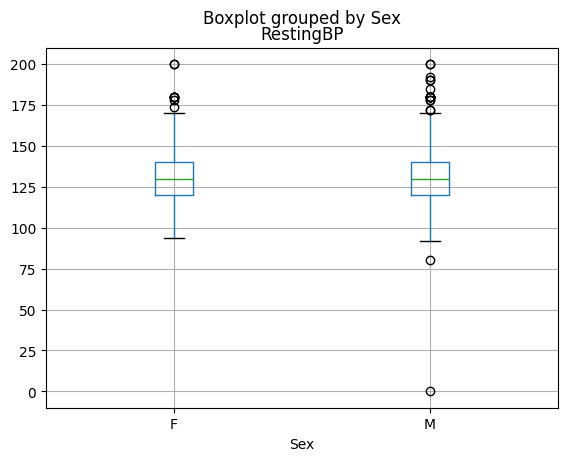

In [9]:
# Observando relações

heart.boxplot('RestingBP', by= 'Sex', showfliers = True)

In [10]:
# Cálculo de média

media_RestingBP = heart["RestingBP"].sum() / len(heart)
print(f'media pressão arterial: {media_RestingBP:.2f}')


media pressão arterial: 132.40


In [11]:
# Verificando valores nulos

heart["RestingBP"].isnull().value_counts()

RestingBP
False    918
Name: count, dtype: int64

In [12]:
# Observando os dados de Resting BP

heart["RestingBP"].value_counts().sort_index()

RestingBP
0       1
80      1
92      1
94      2
95      6
       ..
180    12
185     1
190     2
192     1
200     4
Name: count, Length: 67, dtype: int64

In [13]:
# Alterando os dados numericamente iguais a 0 para a média calculada

heart['RestingBP'] = heart['RestingBP'].replace(0, media_RestingBP)

In [14]:
# Observando a mudança

heart["RestingBP"].value_counts().sort_index()

RestingBP
80.0      1
92.0      1
94.0      2
95.0      6
96.0      1
         ..
180.0    12
185.0     1
190.0     2
192.0     1
200.0     4
Name: count, Length: 67, dtype: int64

<Axes: title={'center': 'RestingBP'}, xlabel='Sex'>

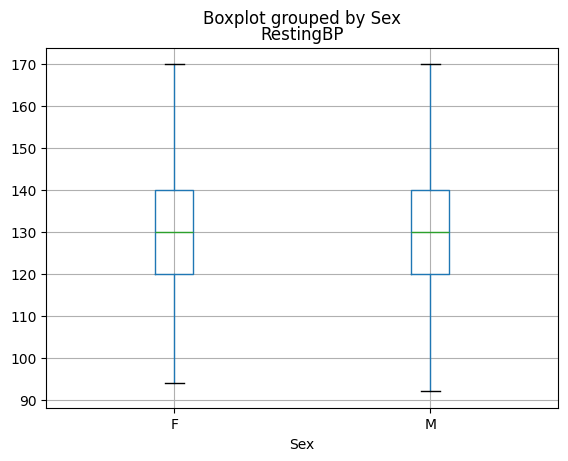

In [15]:
# Verificando gráfico 

heart.boxplot('RestingBP', by='Sex', showfliers= False)

<Axes: title={'center': 'Cholesterol'}, xlabel='Sex'>

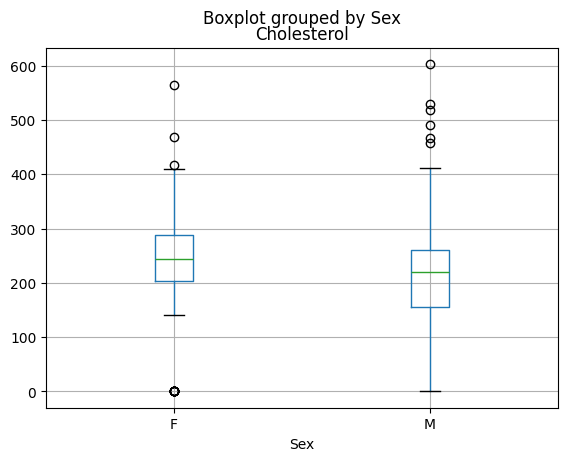

In [16]:
# Observando relação de Colesterol

heart.boxplot('Cholesterol', by= 'Sex', showfliers = True)

In [17]:
# Verificando dados nulos

heart['Cholesterol'].isnull().value_counts()

Cholesterol
False    918
Name: count, dtype: int64

In [18]:
# Observando os dados

heart["Cholesterol"].value_counts().sort_index()

Cholesterol
0      172
85       1
100      2
110      1
113      1
      ... 
491      1
518      1
529      1
564      1
603      1
Name: count, Length: 222, dtype: int64

In [19]:
# Analisando média do colesterol da população do Dataset

media_Cholesterol = heart['Cholesterol'].sum() / len(heart)
print(f'media de Cholesterol: {media_Cholesterol:.2f}')

if media_Cholesterol > 240:
    print("Colesterol alto! (Ideal < 190)")
elif media_Cholesterol < 190:
    print("Colesterol normal")
else:
    print("Colesterol ligeiramente alto")

media de Cholesterol: 198.80
Colesterol ligeiramente alto


In [20]:
# Substituição dos valores 0 para a média

heart['Cholesterol'] = heart['Cholesterol'].replace(0, media_Cholesterol)

In [21]:
# Observando alteração anterior

heart["Cholesterol"].value_counts().sort_index()

Cholesterol
85.0     1
100.0    2
110.0    1
113.0    1
117.0    1
        ..
491.0    1
518.0    1
529.0    1
564.0    1
603.0    1
Name: count, Length: 222, dtype: int64

<Axes: title={'center': 'Cholesterol'}, xlabel='Sex'>

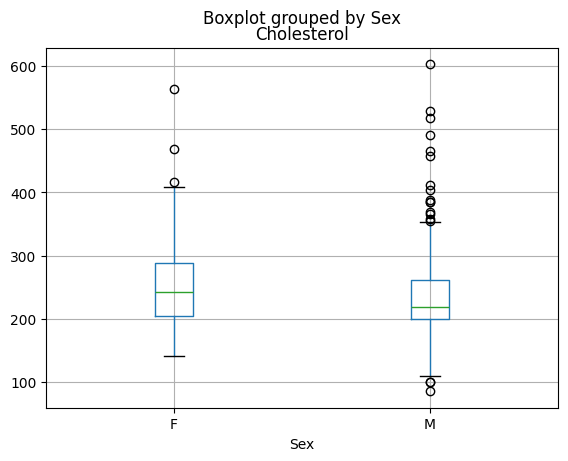

In [22]:
# Observando gráfico após substituição

heart.boxplot('Cholesterol', by='Sex', showfliers= True)

## Construindo Perfil de pessoas com doenças de coração

In [23]:
# Filtrando pessoas com doenças no coração

heart_disease = heart.loc[heart["HeartDisease"] == 1]
heart_disease.head(10)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
1,49,F,NAP,160.0,180.0,0,Normal,156,N,1.0,Flat,1
3,48,F,ASY,138.0,214.0,0,Normal,108,Y,1.5,Flat,1
8,37,M,ASY,140.0,207.0,0,Normal,130,Y,1.5,Flat,1
11,58,M,ATA,136.0,164.0,0,ST,99,Y,2.0,Flat,1
13,49,M,ASY,140.0,234.0,0,Normal,140,Y,1.0,Flat,1
16,38,M,ASY,110.0,196.0,0,Normal,166,N,0.0,Flat,1
18,60,M,ASY,100.0,248.0,0,Normal,125,N,1.0,Flat,1
19,36,M,ATA,120.0,267.0,0,Normal,160,N,3.0,Flat,1
23,44,M,ATA,150.0,288.0,0,Normal,150,Y,3.0,Flat,1
30,53,M,NAP,145.0,518.0,0,Normal,130,N,0.0,Flat,1


In [24]:
# Observando dados

heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
Index: 508 entries, 1 to 916
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             508 non-null    int64  
 1   Sex             508 non-null    object 
 2   ChestPainType   508 non-null    object 
 3   RestingBP       508 non-null    float64
 4   Cholesterol     508 non-null    float64
 5   FastingBS       508 non-null    int64  
 6   RestingECG      508 non-null    object 
 7   MaxHR           508 non-null    int64  
 8   ExerciseAngina  508 non-null    object 
 9   Oldpeak         508 non-null    float64
 10  ST_Slope        508 non-null    object 
 11  HeartDisease    508 non-null    int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 51.6+ KB


### - RESTING BP

In [25]:
# Observando valores

heart_disease["RestingBP"].value_counts()

RestingBP
140.0    55
120.0    55
130.0    52
160.0    34
110.0    32
         ..
102.0     1
106.0     1
92.0      1
185.0     1
164.0     1
Name: count, Length: 61, dtype: int64

<Axes: title={'center': 'RestingBP'}, xlabel='HeartDisease'>

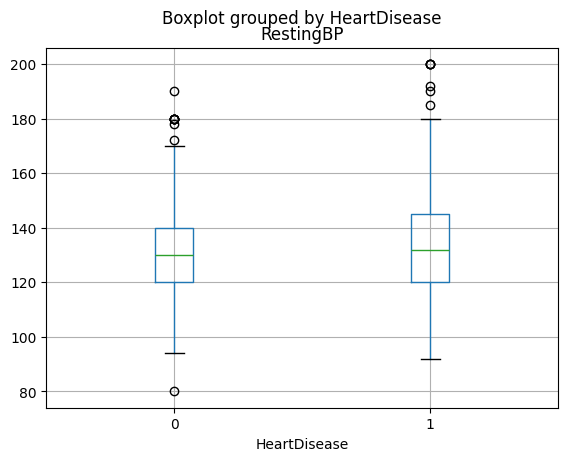

In [26]:
# Observando dispersão dos dados

heart.boxplot("RestingBP", by="HeartDisease")

In [27]:
# Determinando quantidade de pessoas com doenças de coração na base de dados
quantHD = heart_disease["HeartDisease"].value_counts().get(1)
print(
    f"""Quantidade de pessoas com doenças no coração presente na base de dados: {quantHD}
Porcetagem em relação à base de dados: {((quantHD/len(heart))* 100) :.2f}%""")

Quantidade de pessoas com doenças no coração presente na base de dados: 508
Porcetagem em relação à base de dados: 55.34%


In [28]:
# Media Resting BP de pessoas infartadas

media_rbp_infartadas = heart_disease["RestingBP"].sum() / len(heart_disease)
print(f"Media de Resting BP de pessoas infartadas: {media_rbp_infartadas:.2f}")

Media de Resting BP de pessoas infartadas: 134.45


In [29]:
# # Media Resting BP de pessoas não infartadas

# media_rbp_naoInfartadas = heart.loc[heart["HeartDisease"] == 0]["RestingBP"].sum() / heart["HeartDisease"].value_counts()[0]
# print(f"Media de Resting BP de pessoas não infartadas: {media_rbp_naoInfartadas:.2f}")

### - RESTING ECG

In [30]:
# Observando valores

heart_disease["RestingECG"].value_counts()


RestingECG
Normal    285
ST        117
LVH       106
Name: count, dtype: int64

In [31]:
# Substituindo valores texto por numéricos

heart_disease_restECG = heart_disease.replace("Normal", 0).replace("ST", 0.5).replace("LVH", 1)
heart_disease_restECG.head()

C:\Users\FernandoShiraishideA\AppData\Local\Temp\ipykernel_6816\198173969.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  heart_disease_restECG = heart_disease.replace("Normal", 0).replace("ST", 0.5).replace("LVH", 1)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
1,49,F,NAP,160.0,180.0,0,0.0,156,N,1.0,Flat,1
3,48,F,ASY,138.0,214.0,0,0.0,108,Y,1.5,Flat,1
8,37,M,ASY,140.0,207.0,0,0.0,130,Y,1.5,Flat,1
11,58,M,ATA,136.0,164.0,0,0.5,99,Y,2.0,Flat,1
13,49,M,ASY,140.0,234.0,0,0.0,140,Y,1.0,Flat,1


In [32]:
# Verificando alteração anterior

heart_disease_restECG["RestingECG"].value_counts()

RestingECG
0.0    285
0.5    117
1.0    106
Name: count, dtype: int64

In [33]:
# Observando dados

heart_disease_restECG.info()

<class 'pandas.core.frame.DataFrame'>
Index: 508 entries, 1 to 916
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             508 non-null    int64  
 1   Sex             508 non-null    object 
 2   ChestPainType   508 non-null    object 
 3   RestingBP       508 non-null    float64
 4   Cholesterol     508 non-null    float64
 5   FastingBS       508 non-null    int64  
 6   RestingECG      508 non-null    float64
 7   MaxHR           508 non-null    int64  
 8   ExerciseAngina  508 non-null    object 
 9   Oldpeak         508 non-null    float64
 10  ST_Slope        508 non-null    object 
 11  HeartDisease    508 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 51.6+ KB


In [34]:
# Calculando mediana das pessoas que apresentam doenças no coração:
mediana = heart_disease_restECG["RestingECG"].median()

match mediana:
    case 0.0:
        print(f"{mediana} - Normal")
    case 0.5:
        print(f"{mediana} - ST")
    case 1.0:
        print(f"{mediana} - LVH")

0.0 - Normal


In [35]:
# Media ou mediana ? Media faz sentido ?
media = heart_disease_restECG["RestingECG"].mean()

print(media)

0.32381889763779526


### - FASTING BS

In [36]:
# Observando valores

heart_disease["FastingBS"].value_counts()

FastingBS
0    338
1    170
Name: count, dtype: int64

In [37]:
# Verificando se a maioria das pessoas que apresentam doenças no coração apresentam ou não diabetes

median_disease_FBS = heart_disease["FastingBS"].median()

match median_disease_FBS:
    case 0:
        print(f"{median_disease_FBS} - Sem diabetes")
    case 1:
        print(f"{median_disease_FBS} - Com diabetes")

0.0 - Sem diabetes


### - GÊNERO

Pelo fato do dataset estar desequilibrado em relação ao Sexo, será realizado uma análise por sexo separadamente

In [38]:
# Analisando valores

heart["Sex"].value_counts()

Sex
M    725
F    193
Name: count, dtype: int64

In [39]:
# Observando valores para pessoas doentes apenas

heart_disease["Sex"].value_counts()

Sex
M    458
F     50
Name: count, dtype: int64

In [40]:
# Dentre as pessoas que sofrem com doenças de coração, segue a porcetagem de ocorrência em homens

print(f"Porcetagem de ocorrência de doenças de coração nos homens: {heart_disease["Sex"].value_counts().get('M')/(len(heart_disease)) * 100:.2f}%")

Porcetagem de ocorrência de doenças de coração nos homens: 90.16%


In [41]:
# Realizando filtragem por homens

heart_disease_male = heart_disease.loc[heart_disease["Sex"] == "M"]
heart_disease_male.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
8,37,M,ASY,140.0,207.0,0,Normal,130,Y,1.5,Flat,1
11,58,M,ATA,136.0,164.0,0,ST,99,Y,2.0,Flat,1
13,49,M,ASY,140.0,234.0,0,Normal,140,Y,1.0,Flat,1
16,38,M,ASY,110.0,196.0,0,Normal,166,N,0.0,Flat,1
18,60,M,ASY,100.0,248.0,0,Normal,125,N,1.0,Flat,1


In [42]:
# Verificando alteração anterior

heart_disease_male["Sex"].unique()

array(['M'], dtype=object)

In [43]:
# Realizando filtragem por mulheres

heart_disease_female = heart_disease.loc[heart_disease["Sex"] == "F"]
heart_disease_female.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
1,49,F,NAP,160.0,180.0,0,Normal,156,N,1.0,Flat,1
3,48,F,ASY,138.0,214.0,0,Normal,108,Y,1.5,Flat,1
41,54,F,NAP,130.0,294.0,0,ST,100,Y,0.0,Flat,1
51,47,F,ASY,120.0,205.0,0,Normal,98,Y,2.0,Flat,1
102,40,F,ASY,150.0,392.0,0,Normal,130,N,2.0,Flat,1


In [44]:
# Verificando alteração anterior

heart_disease_female["Sex"].unique()

array(['F'], dtype=object)

Calculando a porcetagem de indivíduos com doença no coração por sexo

In [45]:
# Filtrando o DataSet total por Homens
heart_male = heart.loc[heart["Sex"] == 'M']
heart_male.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140.0,289.0,0,Normal,172,N,0.0,Up,0
2,37,M,ATA,130.0,283.0,0,ST,98,N,0.0,Up,0
4,54,M,NAP,150.0,195.0,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120.0,339.0,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110.0,208.0,0,Normal,142,N,0.0,Up,0


In [46]:
# Calculando porcentagem de homens

print(f"Porcentagem de homens, entre os homens, com o coração doente:{(heart_male.loc[heart_male["HeartDisease"] == 1]["Sex"].value_counts().get('M') / len(heart_male)) * 100: .2f}%")

Porcentagem de homens, entre os homens, com o coração doente: 63.17%


In [47]:
# Filtrando o DataSet total por Mulheres
heart_female = heart.loc[heart["Sex"] == 'F']
heart_female.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
1,49,F,NAP,160.0,180.0,0,Normal,156,N,1.0,Flat,1
3,48,F,ASY,138.0,214.0,0,Normal,108,Y,1.5,Flat,1
6,45,F,ATA,130.0,237.0,0,Normal,170,N,0.0,Up,0
9,48,F,ATA,120.0,284.0,0,Normal,120,N,0.0,Up,0
10,37,F,NAP,130.0,211.0,0,Normal,142,N,0.0,Up,0


In [48]:
# Calculando porcetagem de mulheres

print(f"Porcentagem de mulheres, entre as mulheres, com o coração doente:{(heart_female.loc[heart_female["HeartDisease"] == 1]["Sex"].value_counts().get('F') / len(heart_female)) * 100: .2f}%")

Porcentagem de mulheres, entre as mulheres, com o coração doente: 25.91%


### - AGE

In [49]:
# Observando valores

heart_disease["Age"].value_counts().sort_values(ascending=False).head(10)

Age
58    28
61    26
57    26
56    25
62    25
55    24
60    24
59    23
54    23
63    23
Name: count, dtype: int64

In [50]:
# Calculando menor idade e idade mais recorrente

print(f"Menor idade apresentando doenças no coração : {heart_disease["Age"].min()}")
print(f"Idade com maior ocorrência de doenças no coração: {heart_disease["Age"].value_counts().index.to_list()[0]}")

Menor idade apresentando doenças no coração : 31
Idade com maior ocorrência de doenças no coração: 58


<Axes: title={'center': 'Age'}, xlabel='HeartDisease'>

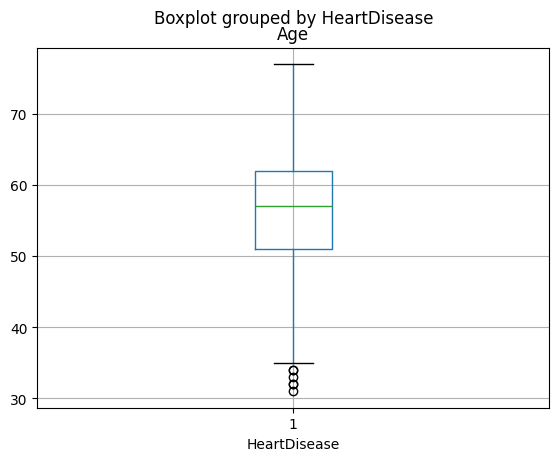

In [51]:
# Observando dispersão dos dados

heart_disease.boxplot("Age", by="HeartDisease")

In [52]:
# Média de idade das pessoas que apresentam doenças no coração
mean_disease_age = heart_disease["Age"].mean()

print(f'Média de idade das pessoas com doença no coração: {mean_disease_age:.2f}')

Média de idade das pessoas com doença no coração: 55.90


In [53]:
# Média de idade dos homens e mulheres com doenças de coração

mean_disease_age_male = heart_disease.loc[heart_disease["Sex"] == "M"]["Age"].mean()
mean_disease_age_female = heart_disease.loc[heart_disease["Sex"] == "F"]["Age"].mean()

print(f'Média de idade dos homens com doença no coração: {mean_disease_age_male:.2f}')
print(f'Média de idade das mulheres com doença no coração: {mean_disease_age_female:.2f}')

Média de idade dos homens com doença no coração: 55.87
Média de idade das mulheres com doença no coração: 56.18


### - MAX HR

In [54]:
# Observando valores

heart_disease["MaxHR"].value_counts()

MaxHR
120    25
150    23
140    23
130    22
125    17
       ..
63      1
83      1
60      1
70      1
164     1
Name: count, Length: 102, dtype: int64

<Axes: title={'center': 'MaxHR'}, xlabel='HeartDisease'>

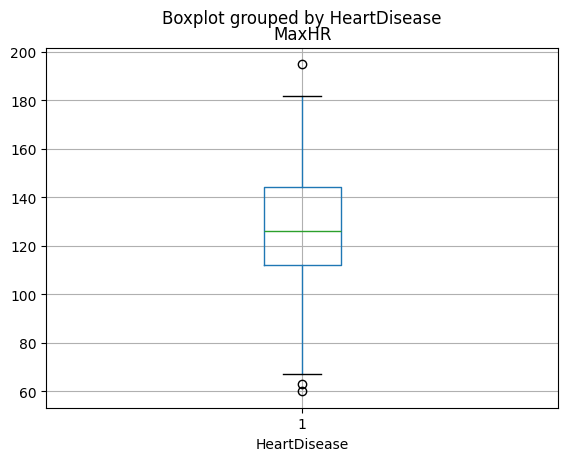

In [55]:
# Observando dispersão dos dados

heart_disease.boxplot("MaxHR", by = "HeartDisease")

In [57]:
# Média de MaxHR para homens
mean_disease_maxHR_male = heart_disease_male["MaxHR"].mean()
print(f"Média dos bpm (batimentos por minuto) máximo dos homens com doenças de coração: {mean_disease_maxHR_male: .2f}")

if mean_disease_maxHR_male > 220 - mean_disease_age_male:
    print("Valor acima do ideal!")
elif mean_disease_maxHR_male < 50:
    print("Batimentos abaixo do normal")
else:
    print("Batimentos nos valores ideais")

Média dos bpm (batimentos por minuto) máximo dos homens com doenças de coração:  126.55
Batimentos nos valores ideais


In [58]:
# Média de MaxHR para mulheres
mean_disease_maxhr_female = heart_disease_female["MaxHR"].mean()
print(f"Média dos bpm (batimentos por minuto) máximo das mulheres com doenças de coração: {mean_disease_maxhr_female: .2f}")

if mean_disease_maxhr_female > 226 - mean_disease_age_female:
    print("Valor acima do ideal!")
elif mean_disease_maxhr_female < 50:
    print("Batimentos abaixo do normal")
else:
    print("Batimentos nos valores ideais")

Média dos bpm (batimentos por minuto) máximo das mulheres com doenças de coração:  137.82
Batimentos nos valores ideais


In [60]:
# Determinando Menor MaxHR e MaxHR com maior ocorrência em homens

print(f"Menor frequência cardíaca máxima em homens que apresentou doença no coração: {heart_disease_male["MaxHR"].min()}")
print(f"Frequência máxima com maior ocorrência de apresentar doenças no coração em homens: {heart_disease_male["MaxHR"].value_counts().index.to_list()[0]}")

Menor frequência cardíaca máxima em homens que apresentou doença no coração: 60
Frequência máxima com maior ocorrência de apresentar doenças no coração em homens: 120


In [61]:
# Determinando Menor MaxHR e MaxHR com maior ocorrência em mulheres

print(f"Menor frequência cardíaca máxima em mulheres que apresentou doença no coração: {heart_disease_female["MaxHR"].min()}")
print(f"Frequência máxima com maior ocorrência de apresentar doenças no coração em mulheres: {heart_disease_female["MaxHR"].value_counts().index.to_list()[0]}")

Menor frequência cardíaca máxima em mulheres que apresentou doença no coração: 90
Frequência máxima com maior ocorrência de apresentar doenças no coração em mulheres: 150


### - CHEST PAIN TYPE (CPT)

In [62]:
# Observando valores

heart_disease["ChestPainType"].value_counts()

ChestPainType
ASY    392
NAP     72
ATA     24
TA      20
Name: count, dtype: int64

In [63]:
# Substituindo valores textos por númericos

heart_disease_CPT = heart_disease.replace('NAP', 0).replace("ASY", 1).replace("ATA", 2).replace("TA", 3)
heart_disease_CPT.head()

C:\Users\FernandoShiraishideA\AppData\Local\Temp\ipykernel_6816\2979614216.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  heart_disease_CPT = heart_disease.replace('NAP', 0).replace("ASY", 1).replace("ATA", 2).replace("TA", 3)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
1,49,F,0,160.0,180.0,0,Normal,156,N,1.0,Flat,1
3,48,F,1,138.0,214.0,0,Normal,108,Y,1.5,Flat,1
8,37,M,1,140.0,207.0,0,Normal,130,Y,1.5,Flat,1
11,58,M,2,136.0,164.0,0,ST,99,Y,2.0,Flat,1
13,49,M,1,140.0,234.0,0,Normal,140,Y,1.0,Flat,1


In [64]:
# Verificando alteração anterior

heart_disease_CPT["ChestPainType"].value_counts()

ChestPainType
1    392
0     72
2     24
3     20
Name: count, dtype: int64

In [65]:
# Cálculo e categorização da mediana

median_disease_CPT = heart_disease_CPT["ChestPainType"].median()

match median_disease_CPT:
    case 0:
        median_disease_CPT_str = "NAP"
    case 1:
        median_disease_CPT_str = "ASY"
    case 2:
        median_disease_CPT_str = "ATA"
    case 3:
        median_disease_CPT_str = "TA"   
 
print("Mediana dos CPT em pessoas com doenças no coração é:", median_disease_CPT_str)

Mediana dos CPT em pessoas com doenças no coração é: ASY


### - EXERCISE ANGINA

In [68]:
# Observando quantas pessoas sentem ou não dores

heart_disease["ExerciseAngina"].value_counts()

ExerciseAngina
Y    316
N    192
Name: count, dtype: int64

In [69]:
# Observando quantos homens sentem ou não dores

heart_disease_male["ExerciseAngina"].value_counts()

ExerciseAngina
Y    289
N    169
Name: count, dtype: int64

In [70]:
# Observando quantas mulheres sentem ou não dores

heart_disease_female["ExerciseAngina"].value_counts()

ExerciseAngina
Y    27
N    23
Name: count, dtype: int64

## Construindo Perfil de Pessoas sem doenças do Coração

In [71]:
# Observando tabela e filtrando dados para sem doença cardíaca

heart_non_disease = heart.loc[heart["HeartDisease"] == 0]
heart_non_disease.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140.0,289.0,0,Normal,172,N,0.0,Up,0
2,37,M,ATA,130.0,283.0,0,ST,98,N,0.0,Up,0
4,54,M,NAP,150.0,195.0,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120.0,339.0,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130.0,237.0,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110.0,208.0,0,Normal,142,N,0.0,Up,0
9,48,F,ATA,120.0,284.0,0,Normal,120,N,0.0,Up,0
10,37,F,NAP,130.0,211.0,0,Normal,142,N,0.0,Up,0
12,39,M,ATA,120.0,204.0,0,Normal,145,N,0.0,Up,0
14,42,F,NAP,115.0,211.0,0,ST,137,N,0.0,Up,0


### - CHOLESTEROL

In [72]:
heart_non_disease["Cholesterol"].value_counts()

Cholesterol
198.799564    20
240.000000     8
220.000000     8
211.000000     7
215.000000     6
              ..
326.000000     1
281.000000     1
173.000000     1
217.000000     1
157.000000     1
Name: count, Length: 169, dtype: int64

In [73]:
# Média do colesterol

mean_non_disease_cholesterol = heart_non_disease["Cholesterol"].mean()

print(f'Média do colesterol em pessoas de coração saudável {mean_non_disease_cholesterol:.2f}')

print("Ligeiramente alto!")

Média do colesterol em pessoas de coração saudável 236.82
Ligeiramente alto!


### - RESTING BP

In [74]:
# Observando dados

heart_non_disease["RestingBP"].value_counts(ascending=False).head(10)

RestingBP
120.0    77
130.0    66
140.0    52
110.0    26
150.0    25
160.0    16
125.0    10
138.0    10
132.0    10
100.0     8
Name: count, dtype: int64

In [75]:
# Cálculo de média

mean_non_disease_RBP = heart_non_disease["RestingBP"].mean()

print(f"Média da pressão sanguínea de pessoas sem problemas de coração: {mean_non_disease_RBP:.2f}")

Média da pressão sanguínea de pessoas sem problemas de coração: 130.18


In [106]:
# Cálculo de média por Gênero

print("Média de RestingBP dos homens sem doença cardíaca: ", heart_non_disease.loc[heart_non_disease["Sex"] == 'M']["RestingBP"].mean())
print("Média de RestingBP das mulheres sem doença cardíaca: ", heart_non_disease.loc[heart_non_disease["Sex"] == 'F']["RestingBP"].mean())

Média de RestingBP dos homens sem doença cardíaca:  130.9250936329588
Média de RestingBP das mulheres sem doença cardíaca:  128.7902097902098


### - RESTING ECG

In [77]:
# Observando valores

heart_non_disease["RestingECG"].value_counts()

RestingECG
Normal    267
LVH        82
ST         61
Name: count, dtype: int64

É possível observar a prevalência de pessoas com atividade elétrica cardíaca normais

### - FASTING BS

In [78]:
# Observando valores

heart_non_disease["FastingBS"].value_counts()

FastingBS
0    366
1     44
Name: count, dtype: int64

Pelo o que se pode observar, a maioria das pessoas sem problemas no coração não apresentam diabetes

### - GÊNERO

In [79]:
# Observando valores do Gênero

heart_non_disease["Sex"].value_counts()

Sex
M    267
F    143
Name: count, dtype: int64

In [80]:
# Calculo porcentagem de homens

percentage_men_non_disease = heart_non_disease["Sex"].value_counts().get('M') / (heart_non_disease["Sex"].value_counts().get('M') + heart_non_disease["Sex"].value_counts().get('F'))

print(f"Porcentagem de homens sem doença no coração: {percentage_men_non_disease * 100:.2f}%")

Porcentagem de homens sem doença no coração: 65.12%


In [81]:
# Calculo Porcentagem de mulheres

print(f"Porcentagem de mulheres sem doença no coração: {(1 - percentage_men_non_disease) * 100:.2f}%")

Porcentagem de mulheres sem doença no coração: 34.88%


In [82]:
# Dataset filtrado por homens

heart_non_disease_male = heart_non_disease.loc[heart_non_disease["Sex"] == 'M']

In [83]:
# Verificando alteração anterior

heart_non_disease_male.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140.0,289.0,0,Normal,172,N,0.0,Up,0
2,37,M,ATA,130.0,283.0,0,ST,98,N,0.0,Up,0
4,54,M,NAP,150.0,195.0,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120.0,339.0,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110.0,208.0,0,Normal,142,N,0.0,Up,0
12,39,M,ATA,120.0,204.0,0,Normal,145,N,0.0,Up,0
21,44,M,ATA,120.0,184.0,0,Normal,142,N,1.0,Flat,0
24,40,M,NAP,130.0,215.0,0,Normal,138,N,0.0,Up,0
25,36,M,NAP,130.0,209.0,0,Normal,178,N,0.0,Up,0
26,53,M,ASY,124.0,260.0,0,ST,112,Y,3.0,Flat,0


In [84]:
# Dataset filtrado por mulheres

heart_non_disease_female = heart_non_disease.loc[heart_non_disease["Sex"] == 'F']

In [85]:
# Verificando alteração anterior

heart_non_disease_female.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
6,45,F,ATA,130.0,237.0,0,Normal,170,N,0.0,Up,0
9,48,F,ATA,120.0,284.0,0,Normal,120,N,0.0,Up,0
10,37,F,NAP,130.0,211.0,0,Normal,142,N,0.0,Up,0
14,42,F,NAP,115.0,211.0,0,ST,137,N,0.0,Up,0
15,54,F,ATA,120.0,273.0,0,Normal,150,N,1.5,Flat,0
17,43,F,ATA,120.0,201.0,0,Normal,165,N,0.0,Up,0
20,43,F,TA,100.0,223.0,0,Normal,142,N,0.0,Up,0
22,49,F,ATA,124.0,201.0,0,Normal,164,N,0.0,Up,0
28,53,F,ATA,113.0,468.0,0,Normal,127,N,0.0,Up,0
34,43,F,ATA,150.0,186.0,0,Normal,154,N,0.0,Up,0


### - AGE

In [86]:
# Observando os valores de idade

heart_non_disease["Age"].value_counts(ascending=False).head(10)

Age
54    28
51    20
41    18
53    18
52    17
55    17
48    16
45    15
42    15
58    14
Name: count, dtype: int64

<Axes: title={'center': 'Age'}, xlabel='HeartDisease'>

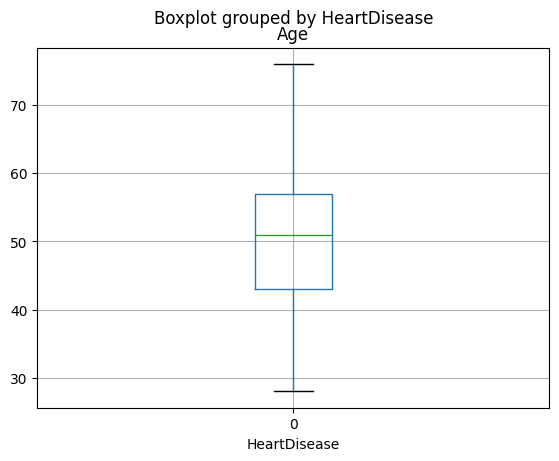

In [87]:
# Analisando dispersão dos dados

heart_non_disease.boxplot("Age", by="HeartDisease")

In [88]:
# Maior idade sem problemas no coração

print("A maior idade sem apresentar doenças no coração foi:", heart_non_disease["Age"].max())

A maior idade sem apresentar doenças no coração foi: 76


In [89]:
# Homem com a maior idade sem doenças

print("Homem com a maior idade sem doenças:", heart_non_disease_male["Age"].max())

# Mulher com a maior idade sem doenças

print("Mulher com a maior idade sem doenças:", heart_non_disease_female["Age"].max())

Homem com a maior idade sem doenças: 75
Mulher com a maior idade sem doenças: 76


In [90]:
# Idade com maior frequência de não apresentar doenças no coração

print("Idade com maior frequência de não estar com doença no coração:", heart_non_disease["Age"].value_counts().index.to_list()[0])

Idade com maior frequência de não estar com doença no coração: 54


In [91]:
# Calculando a média das pessoas sem doença no coração

mean_non_disease_age = heart_non_disease["Age"].mean()

print(f'Média de idade de pessoas sem doença no coração: {mean_non_disease_age:.2f}')

Média de idade de pessoas sem doença no coração: 50.55


In [92]:
# Calculando a média de idade dos homens

mean_non_disease_age_male = heart_non_disease_male["Age"].mean()

print(f'Média de idade dos homens sem doença no coração: {mean_non_disease_age_male:.2f}')

Média de idade dos homens sem doença no coração: 50.20


In [93]:
# Calculando a média de idade das mulheres

mean_non_disease_age_female = heart_non_disease_female["Age"].mean()

print(f'Média de idade das mulheres sem doença no coração: {mean_non_disease_age_female:.2f}')

Média de idade das mulheres sem doença no coração: 51.20


### - MAX HR

In [94]:
# Observando os valores da coluna MaxHR

heart_non_disease["MaxHR"].value_counts()

MaxHR
150    20
160    19
140    18
170    14
130    11
       ..
97      1
99      1
80      1
69      1
123     1
Name: count, Length: 90, dtype: int64

In [95]:
# Frequência cardíaca máxima mais frequente (sem doença no coração)

heart_non_disease["MaxHR"].value_counts(ascending=False).index.to_list()[0]

150

In [96]:
# Maior frequência cardícaca máxima

print(f"Maior frequência cardíaca máxima encontrada: {heart_non_disease["MaxHR"].max()}")

Maior frequência cardíaca máxima encontrada: 202


In [97]:
# Idade de quem apresentou a maior frequência cardíaca máxima

age_maxHr = heart_non_disease.loc[heart_non_disease["MaxHR"] == heart_non_disease["MaxHR"].max()]
print(f"Idade da pessoa com maior frequência cardíaca: {age_maxHr["Age"].value_counts().index.to_list()[0]}")

Idade da pessoa com maior frequência cardíaca: 29


In [98]:
# Média da frequência cardíaca máxima das pessoas sem problemas de coração

mean_non_disease_maxHR = heart_non_disease["MaxHR"].mean()
print(f"Média da frequência máxima dos não doentes: {mean_non_disease_maxHR:.2f}")

Média da frequência máxima dos não doentes: 148.15


In [99]:
# Verifica se os batimentos estão nos valores ideais para o sexo masculino

mean_non_disease_maxHR_male = heart_non_disease_male["MaxHR"].mean()

if mean_non_disease_maxHR_male > 220 - mean_non_disease_age_male:
    print("Valor acima do ideal!")
elif mean_non_disease_maxHR_male < 50:
    print("Batimentos abaixo do normal")
else:
    print("Batimentos nos valores ideais")

Batimentos nos valores ideais


In [100]:
# Verifica se os batimentos estão nos valores ideais para o sexo feminino

mean_non_disease_maxHR_female = heart_non_disease_female["MaxHR"].mean()

if mean_non_disease_maxHR_female > 226 - mean_non_disease_age_female:
    print("Valor acima do ideal!")
elif mean_non_disease_maxHR_female < 50:
    print("Batimentos abaixo do normal")
else:
    print("Batimentos nos valores ideais")

Batimentos nos valores ideais


### - CHEST PAIN TYPE (CPT)

In [101]:
# Observando a coluna ChestPainType

heart_non_disease["ChestPainType"].value_counts()

ChestPainType
ATA    149
NAP    131
ASY    104
TA      26
Name: count, dtype: int64

In [102]:
# Substituindo valores de texto por númericos

heart_non_disease_CPT = heart_non_disease.replace('NAP', 0).replace("ASY", 1).replace("ATA", 2).replace("TA", 3)
heart_non_disease_CPT.head()

C:\Users\FernandoShiraishideA\AppData\Local\Temp\ipykernel_6816\2304627236.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  heart_non_disease_CPT = heart_non_disease.replace('NAP', 0).replace("ASY", 1).replace("ATA", 2).replace("TA", 3)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,2,140.0,289.0,0,Normal,172,N,0.0,Up,0
2,37,M,2,130.0,283.0,0,ST,98,N,0.0,Up,0
4,54,M,0,150.0,195.0,0,Normal,122,N,0.0,Up,0
5,39,M,0,120.0,339.0,0,Normal,170,N,0.0,Up,0
6,45,F,2,130.0,237.0,0,Normal,170,N,0.0,Up,0


In [103]:
# Verificando valores substituídos

heart_non_disease_CPT["ChestPainType"].value_counts()

ChestPainType
2    149
0    131
1    104
3     26
Name: count, dtype: int64

In [104]:
# Calculando mediana e catalogando o tipo selecionado

median_non_disease_CPT = heart_non_disease_CPT["ChestPainType"].median()

match median_non_disease_CPT:
    case 0:
        median_non_disease_CPT_str = "NAP"
    case 1:
        median_non_disease_CPT_str = "ASY"
    case 2:
        median_non_disease_CPT_str = "ATA"
    case 3:
        median_non_disease_CPT_str = "TA"   
 
print(f"Mediana dos CPT em pessoas sem doenças no coração é: {median_non_disease_CPT_str} (grau {median_disease_CPT})")

Mediana dos CPT em pessoas sem doenças no coração é: ASY (grau 1.0)


### - EXERCISES ANGINA

In [105]:
# Verificando quantos sentem e não sentem dores

heart_non_disease["ExerciseAngina"].value_counts()

ExerciseAngina
N    355
Y     55
Name: count, dtype: int64

Como podemos observar a maioria das pessoas sem problemas no coração não sentem incômodos ao realizar exercícios

# Conclusão Final

## Perfil de pessoas com doenças cardíacas

Dessa forma, com base nesses dados o perfil de uma pessoa com pré disposição a ter doenças no coração seria:

- Homem
- 56 anos
- Colesterol acima do normal
- Sente dores ao se esforçar fisicamente
- Pressão sanguínea alta

Diabetes, Atividade Elétrica do Coração em Repouso (Resting ECG) e Frequência Cardíaca Máxima não apresentaram influências significativas baseado nesta amostra.

Importante observar, também, que a menor idade com ocorrência de doenças no coração foi de 31 anos.

E a idade com maior frequência a ter problemas de coração foi de 58 anos.

## Perfil de pessoas sem doenças cardíacas:

Concluimos que o perfil de pessoas sem problemas no coração é representado por:

* 50 anos
* Frequência Máxima adequada
* Sem diabetes
* Sem incômodos para praticar exercícios
* Sem anormalidades na atividade elétrica do coração

Tipo de dor no peito, pressão sanguínea e colesterol não representaram uma influência significativa baseado nesta amostra.

Importante observar que a base de dados possui um desbalanceamento quanto ao sexo dos indivíduos, dificultando uma análise de acordo com esse aspecto.

Porém foi possível observar uma queda significativa da porcetagem de homens com doenças para os saudáveis de coração (aproximadamente 30%).

## Conclusão

De acordo com os cenários analisados, foi possível observar que os fatores mais determinísticos demonstrando problemas no coração foi a **atividade elétrica no coração (ECG)** e **presença de dores na prática de atividade física**.

Os demais fatores clínicos demonstraram ser indicativos do cuidado da saúde de cada indivíduo, mas não apresentaram relação direta com problemas no coração.

Desse modo, com essas informações não podemos analisar se é o indivíduo é saudável ou não. Pois, falta informações importantes para esta tomada de decisão.